<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [2]:
import re
import string

#!pip install -U nltk

import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [6]:
import requests 
import bs4
from bs4 import BeautifulSoup
import time

In [20]:
url_i = 'https://www.indeed.com/jobs?q=data+scientist&l=Virginia&start=10'

page = requests.get(url_i)

soup = BeautifulSoup(page.text, "html.parser")
#print(soup.prettify())

In [8]:
def get_job_title(soup):
    jobs = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            jobs.append(a["title"])
    return(jobs)

In [95]:
ttls = get_job_title(soup)
for t in ttls: print(t)
print('\n\nlen: ', len(ttls))

Data Scientist
Data Scientist
Data Scientist
Data Scientist/Analyst (DOD Secret Required)
Data Scientist
Senior Associate, Data Scientist- Bank Operations
Data Scientist
Data Scientist
Data Scientist (Secret Clearance)
Data Scientist
Network Data Scientist
Data Scientist
Data Scientist - Path Forward Returnship
Senior Data Scientist
Data Scientist
Data Scientist - You Make Data Sing
Data Scientist
Data Scientist
Data Scientist


len:  19


In [10]:
def get_company(soup):
    companies = []
    for div in soup.find_all(name='div', attrs={'class':'row'}):
        company = div.find_all(name='span', attrs={'class':'company'})
        if len(company) > 0:
            for c in company:
                companies.append(c.text.strip())
        else:
            other_c = div.find_all(name='span', attrs={'class':'result-link-source'})
            for c in other_c:
                companies.append(c.text.strip())
    return(companies)

In [94]:
cmpny = get_company(soup)
for c in cmpny: print(c)
print('\n\nlen: ', len(cmpny))

Indeed Prime
Ethics & Compliance Initiative (ECI)
Elder Research Inc
Stem IT
Smithfield Foods
Capital One
Verizon
PwC
MRP
Amazon Web Services, Inc.
Verizon
CACI
Walmart
MRP
Uniforce Technologies
NT Concepts
Axiologic Solutions
Dogwood Management Partners
PRA Group, Inc.


len:  19


In [77]:
def get_loc(soup):
    locations = []
    for div in soup.find_all(name='div', attrs={'class':'row'}):
        loc = div.find(name='span', attrs={'class':'location'})
        if loc != None:
            locations.append(loc.text.strip())
        else:
            sjcl = div.find_all(name='div', attrs={'class':'sjcl'})
            for s in sjcl:
                loc = s.find(name='div', attrs={'class':'location'})
                locations.append(loc.text.strip())
    return(locations)

In [96]:
loca = get_loc(soup)
for l in loca: print(l)
print('\n\nlen: ', len(loca))

Richmond, VA
Vienna, VA 22180
Arlington, VA 22201 (Lyon Village area)
Arlington, VA
Smithfield, VA 23430
Richmond, VA 23233
Ashburn, VA 20147
Arlington, VA 22209 (Radnor-Ft Myer Heights area)
Tysons Corner, VA
Virginia
Ashburn, VA 20147
Reston, VA 20190
Reston, VA
Reston, VA
Richmond, VA
Vienna, VA 22182
Virginia
Reston, VA
Norfolk, VA


len:  19


In [82]:
def get_summary(soup):
    summaries = []
    for div in soup.find_all(name='div', attrs={'class':'row'}):
        summ = div.find(name='div', attrs={'class':'summary'})
        summaries.append(summ.text.strip())
    return(summaries)

In [97]:
smry = get_summary(soup)
for s in smry: print(s)
print('\n\nlen: ', len(smry))

You bring unique qualities and traits that stand out and make an impact. We look for top tech talent to join the Indeed Prime platform....
Experience creating and using advanced machine learning algorithms and statistics:. Develop and/or enhance existing data models and algorithms....
Git, svn, Mercurial) and collaborative programming techniques (e.g. Bachelor’s of Science degree in a technical field. Experience using version control (e.g....
Bachelors degree in related field. Proficient with Python and R languages. Experience with SQL and/or Postgres. Full-time Direct hire with amazing benefits....
Considerable experience in solving business problems with advanced analytical solutions. Perform large-scale experimentation and build data-driven models to...
Senior Associate, Data Scientist- Bank Operations. Senior Associate Data Scientist, Bank Operations Data Science....
Work cross functionally with teams to develop growth and retention strategies. Experience with SQL and either Python

In [106]:
columns = ['job_title', 'company_name', 'location', 'summary']

jobs = pd.DataFrame(columns=columns)
    

In [107]:
for start in range(0, 100, 10):
    
    url_i = 'https://www.indeed.com/jobs?q=data+scientist&l=Virginia&start=10'

    page = requests.get(url_i)
    soup = BeautifulSoup(page.text, "html.parser")
    
    titles = get_job_title(soup)
    companies = get_company(soup)
    locations = get_loc(soup)
    summary = get_summary(soup)
    for i in range(len(titles)):
        index = len(jobs) + 1
        post = {"job_title":titles[i],
                'company_name':companies[i],
                'location':locations[i],
                'summary':summary[i]}
        jobs.loc[index] = post

In [110]:
jobs.shape

(178, 4)

In [192]:
jobs.head(2)

,job_title,company_name,location,summary,summary_tok
1,Data Scientist,Indeed Prime,"Richmond, VA",Get matched – Companies apply to you with oppo...,"[get, matched, companies, apply, to, you, with..."
2,Data Scientist,Smithfield Foods,"Smithfield, VA 23430",The ideal candidate is adept at preparing larg...,"[the, ideal, candidate, is, adept, at, prepari..."


## 2) Use Spacy to tokenize / clean the listings 

In [114]:
import spacy
from spacy.tokenizer import Tokenizer

In [115]:
nlp = spacy.load("en_core_web_md")

In [116]:
tokenizer = Tokenizer(nlp.vocab)

In [190]:
def tokenize_pdseries(series):
    tokens = []

    for doc in tokenizer.pipe(series, batch_size=500):
        doc_tok = []
        for tok in doc:
            if (tok.is_stop == False) and (tok.is_punct == False):
                doc_tok.append(tok.text.lower())
        tokens.append(doc_tok)
    
    for i in range(len(tokens)):
        tokens[i][-1] = tokens[i][-1].strip(".")
    return(tokens)

In [191]:
jobs['summary_tok'] = tokenize_pdseries(jobs['summary'])

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [196]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english')

cvect.fit(jobs['summary'].values)
print(cvect.vocabulary_)
dtm_count = cvect.transform(jobs['summary'])

{'matched': 235, 'companies': 76, 'apply': 22, 'opportunities': 278, 'reflect': 337, 'role': 351, 'location': 224, 'salary': 353, 'specifications': 383, 'prime': 308, 'works': 450, 'ideal': 178, 'candidate': 55, 'adept': 2, 'preparing': 303, 'large': 216, 'data': 93, 'sets': 367, 'applying': 23, 'statistical': 389, 'algorithmic': 6, 'mining': 253, 'visualization': 443, 'techniques': 408, 'hidden': 174, 'insights': 195, 'scientist': 359, 'key': 211, 'person': 289, 'vbg': 437, 'products': 314, 'competitive': 79, 'positioning': 297, 'needs': 266, 'trying': 425, 'different': 120, 'predictive': 301, 'modeling': 255, 'approaches': 24, 'identify': 180, 'best': 43, 'fit': 154, 'given': 169, 'set': 366, 'business': 53, 'understanding': 429, 'available': 35, 'project': 320, 'timeline': 417, 'creating': 87, 'analytic': 14, 'models': 256, 'improve': 184, 'metrics': 249, 'analyzing': 18, 'customer': 90, 'behavior': 41, 'trends': 424, 'delivering': 102, 'stakeholders': 386, 'executives': 143, 'platf

In [197]:
dtm_count.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [198]:
dtm_df = pd.DataFrame(dtm_count.todense(), columns = cvect.get_feature_names())
dtm_df.shape

(178, 454)

In [199]:
dtm_df.head()

,ability,access,adept,advanced,advertising,agile,algorithmic,algorithms,amazing,amazon,...,vital,warehousing,web,wide,work,working,works,world,xml,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

In [270]:
import squarify
import matplotlib.pyplot as plt

In [218]:
for col in dtm_df.columns:
    i = 1
    for x in dtm_df[col]:
        if x > 1:
            print("i", col, col.index)
            i += 1

i analysts <built-in method index of str object at 0x7fa4a1f4f8f0>
i analysts <built-in method index of str object at 0x7fa4a1f4f8f0>
i analysts <built-in method index of str object at 0x7fa4a1f4f8f0>
i customer <built-in method index of str object at 0x7fa4a1fbd930>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str object at 0x7fa4a20a02d0>
i data <built-in method index of str ob

In [219]:
print(dtm_df['data'].sum())
print(sum(x > 0 for x in dtm_df['data']))

246
137


In [302]:
def get_counts(dtm):
    counts = pd.DataFrame(columns=['word', 'appears_in', 
                                   'count', 'rank', 
                                   'pct_total', 'appears_in_pct'])
    c = []
    for col in dtm.columns:
        total = dtm[col].sum()
        c.append([col, total])
    
    c = sorted(c, key=lambda x: x[1], reverse=True)
        
    for i in range(len(c)):
        c[i].append(i + 1)
        
    rank = dict(map(lambda x: x[0::2], c))

    total = sum(dtm[col].sum() for col in dtm.columns)
    
    for i in range(len(dtm.columns)):
        col = dtm.columns[i]
        col_total = dtm[col].sum()
        app_total = sum(x > 0 for x in dtm[col])
        vocab_info = {
            'word':col,
            'appears_in': app_total,
            'count': col_total,
            'rank': rank[col],
            'pct_total': col_total / total,
            'appears_in_pct': app_total / len(dtm)
        }
        counts.loc[i] = vocab_info
    counts['cul_pct_total'] = counts['pct_total'].cumsum()
    return(counts)
        

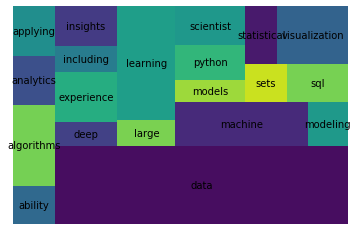

In [303]:
wcounts = get_counts(dtm_df)
wc_top40 = wcounts.loc[wcounts['rank'] <= 20]

squarify.plot(sizes=wc_top40['pct_total'], label=wc_top40['word'])
plt.axis('off')
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

dtm_tfidf = tfidf.fit_transform(jobs['summary'])
docs = pd.DataFrame(dtm_tfidf.todense(), columns = tfidf.get_feature_names())
docs.head()


,ability,access,adept,advanced,advertising,agile,algorithmic,algorithms,amazing,amazon,...,vital,warehousing,web,wide,work,working,works,world,xml,years
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.304901,0.0,0.0,0.0
1,0.0,0.0,0.30224,0.0,0.0,0.0,0.30224,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [317]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')

nn.fit(dtm_tfidf.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [318]:
nn.kneighbors(dtm_tfidf.todense()[0])

(array([[0., 0., 0., 0., 0., 0.]]), array([[ 52, 125,  34,  17,   0, 106]]))

In [319]:
job = "As a data scientist you will look for trends and develop models that will help made other peoples jobs simpler and more effective"

In [320]:
job_tfidf = tfidf.transform([job])

In [321]:
nn.kneighbors(job_tfidf.todense())

(array([[1.26006672, 1.26006672, 1.26006672, 1.26006672, 1.26006672,
         1.26006672]]), array([[ 38, 126,  89,   4,  21, 107]]))

In [323]:
four_n = [38, 126,  89,   4,  21, 107]
for n in four_n:
    print(jobs.loc[n])

job_title                                          Data Scientist
company_name                                   Elder Research Inc
location                  Arlington, VA 22201 (Lyon Village area)
summary         Trying different predictive modeling approache...
summary_tok     [trying, different, predictive, modeling, appr...
Name: 38, dtype: object
job_title                                          Data Scientist
company_name                                         Indeed Prime
location                                              Norfolk, VA
summary         Get matched – Companies apply to you with oppo...
summary_tok     [get, matched, companies, apply, to, you, with...
Name: 126, dtype: object
job_title                                          Data Scientist
company_name                                         Indeed Prime
location                                              Norfolk, VA
summary         Get matched – Companies apply to you with oppo...
summary_tok     [get, match

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.